/home/digitalopt/proj/depth_estimation


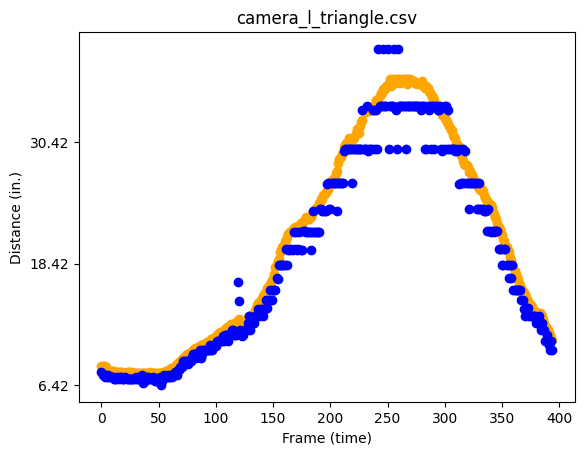

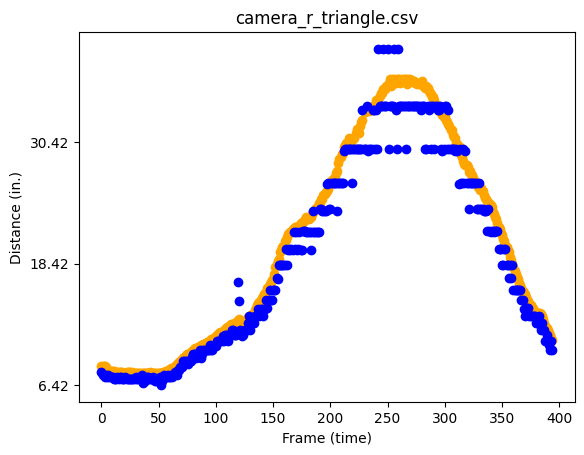

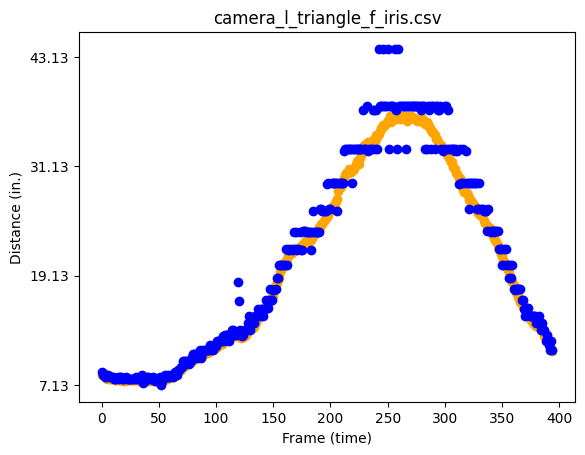

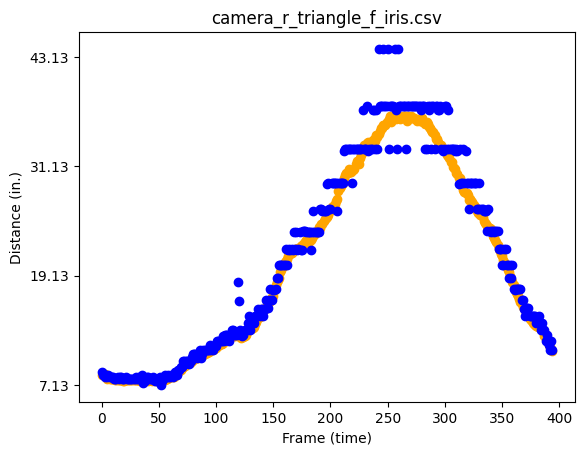

In [61]:
import matplotlib.pyplot as plt
import csv
import os
from math import sqrt
import numpy as np

print(os.getcwd())
files = ['gt_gt.csv', 'camera_l_neural_depth.csv', 'camera_r_neural_depth.csv', 'camera_l_triangle.csv', 'camera_r_triangle.csv',
         'camera_l_triangle_f_iris.csv', 'camera_r_triangle_f_iris.csv']

def rmse(y, yhat):
    errors = list(map(lambda x: (x[0] - x[1])**2, zip(y, yhat)))
    return sqrt((sum(errors)/ len(errors)))

def depth_2_dist(y, yhat):
    '''
    given dataset of relative inverse depths and gt_depths (cm),
    finds a linear relationship in form pred = mx + b
    returns absolute depth (cm).
    '''
    # invert gt to get inverse depth
    gt = list(map(lambda x: 1/x, y))
    # align prediction based on least squares estimates
    A = np.vstack([gt, np.ones(len(gt))]).T
    m, b = np.linalg.lstsq(A, yhat, rcond=None)[0]
    # transform relative inverse depth to absolute depth
    return [i * m + b for i in yhat]

reader = csv.reader
data = []
for n in files:
    p = './results/iris/' + n
    with open(p) as f:
        reader = csv.reader(f)
        for idx, row in enumerate(reader):
            if idx == 1:
                if n.split('_')[-1] == 'depth.csv':
                    row = list(map(lambda x: round(float(x) * 2.54, 2), row))
                    data.append(row) 
                else:
                    row = list(map(lambda x: round(float(x), 2), row))
                    data.append(row)
xvals = [i for i in range(len(data[0]))]

colors = [i for i in range(len(data))]
gt = data[0]
for idx, dset in enumerate(data[1:]):
    # print(len(gt), len(dset))
    if idx < 2:
        continue
        # dset = [1000 / x for x in dset]
    #     dset = depth_2_dist(gt, dset)
    plt.scatter(xvals, gt, c='orange')
    plt.scatter(xvals, dset, c='blue')
    if max(dset) > max(gt):
        plt.yticks(np.arange(min(dset), max(dset) + 1, 12))
    else:
        plt.yticks(np.arange(min(gt), max(gt) + 1, 12))
    plt.title(files[idx+1])
    plt.xlabel('Frame (time)')
    plt.ylabel('Distance (in.)')
    # plt.legend((gt, dat), ('gt', files[idx+1]))

    plt.savefig('./results/' + files[idx+1].split('.')[0] + '.png')
    plt.show()


In [59]:
from statistics import stdev

bins = {i:list() for i in range(11)}

for val in gt:
    if val > 0 and val < 12.0:
        bins[0].append(val)
    if val >= 12.0 and val < 24.0:
        bins[1].append(val)
    if val >= 24.0 and val < 36.0:
        bins[2].append(val)
    if val >= 36.0 and val < 48.0:
        bins[3].append(val)
    if val >= 48.0 and val < 60.0:
        bins[4].append(val)
    if val >= 60.0 and val < 72.0:
        bins[5].append(val)
    if val >= 72.0 and val < 84.0:
        bins[6].append(val)
    if val >= 84.0 and val < 96.0:
        bins[7].append(val)
    if val >= 96.0 and val < 108.0:
        bins[8].append(val)
    if val >= 108.0 and val < 120.0:
        bins[9].append(val)
    if val >= 129.0 and val < 136.0:
        bins[10].append(val)

In [60]:
for k in bins.keys():
    print(f'\ndistance: {k+1} ft length: {len(bins[k])} stddev: {stdev(bins[k])}')


distance: 1 ft length: 212 stddev: 2.0692851378791293

distance: 2 ft length: 233 stddev: 3.641202680866492

distance: 3 ft length: 188 stddev: 3.7544238403470387

distance: 4 ft length: 134 stddev: 1.6825720517886356


StatisticsError: variance requires at least two data points

In [57]:
for k in bins.keys():
    print(f'\ndistance: {k+1} ft length: {len(bins[k])} stddev: {stdev(bins[k])}')


distance: 1 ft length: 114 stddev: 1.4601783759573397

distance: 2 ft length: 129 stddev: 3.9868591803612787

distance: 3 ft length: 123 stddev: 3.7283822443077725

distance: 4 ft length: 29 stddev: 0.19348820307466924


StatisticsError: variance requires at least two data points

In [54]:
for k in bins.keys():
    print(f'\ndistance: {k+1} ft length: {len(bins[k])} stddev: {stdev(bins[k])}')


distance: 1 ft length: 54 stddev: 1.4899723521135864

distance: 2 ft length: 57 stddev: 3.787824636409462

distance: 3 ft length: 42 stddev: 4.0509956333437955

distance: 4 ft length: 78 stddev: 4.045871581807417

distance: 5 ft length: 62 stddev: 3.5677088748309234

distance: 6 ft length: 88 stddev: 3.644989588290494

distance: 7 ft length: 59 stddev: 2.4119131077373592

distance: 8 ft length: 66 stddev: 3.1827258405687107

distance: 9 ft length: 87 stddev: 4.691095730206309

distance: 10 ft length: 55 stddev: 0.0

distance: 11 ft length: 37 stddev: 0.0
